# Seoul Bike Data

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, metrics
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Try reading the CSV file with different encoding
bike_df = pd.read_csv('/Users/nikitaakenkre/Downloads/SeoulBikeData.csv', encoding='latin-1')

# Display the DataFrame
bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Data Cleaning : Removing Missing values

In [3]:
# Checking for Missing Values
missing_values = bike_df.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values)

total_missing_values = bike_df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
Total missing values in the DataFrame: 0


## Exploratory Data Analysis

In [4]:
bike_df_1 = bike_df.drop('Date', axis=1)

bike_df_1 = bike_df_1.drop('Seasons', axis=1)

bike_df_1 = bike_df_1.drop('Holiday', axis=1)

bike_df_1 = bike_df_1.drop('Functioning Day', axis=1)

In [5]:
bike_df_1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


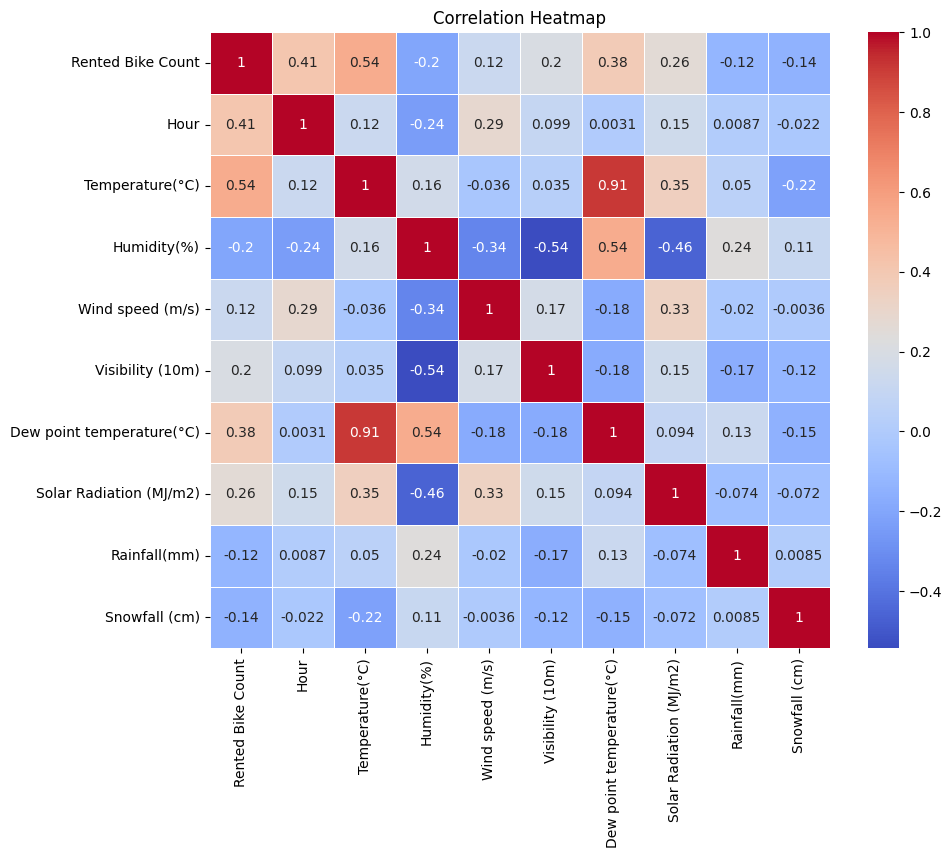

In [6]:
# Calculating the correlation matrix
correlation_matrix = bike_df_1.corr()

# Creating a heatmap using seaborn libary
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

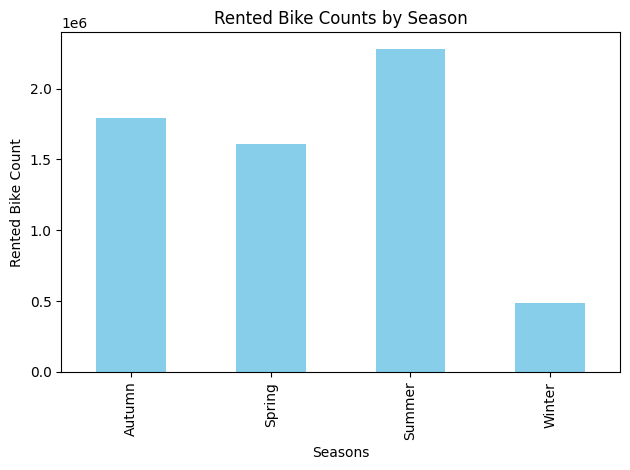

In [7]:
# Group the data by 'Seasons' and calculate the sum of rented bike counts for each season
season_counts = bike_df.groupby('Seasons')['Rented Bike Count'].sum()

# Plotting the bar graph
season_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Rented Bike Counts by Season')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')

# Show the plot
plt.tight_layout()
plt.show()

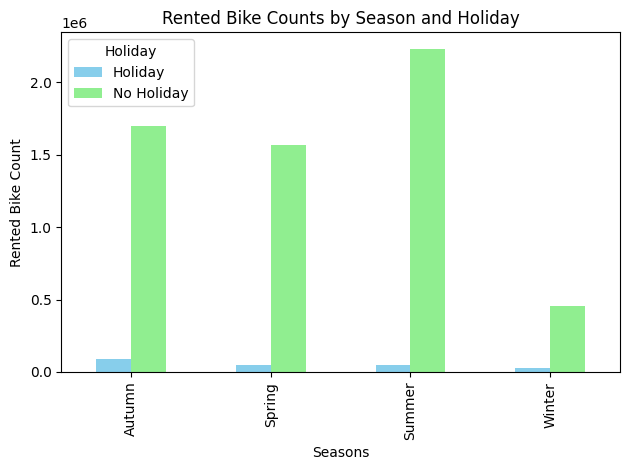

In [8]:
df = pd.DataFrame(bike_df)

# Group the data by 'Seasons' and 'Holiday' and calculate the sum of rented bike counts for each group
season_holiday_counts = df.groupby(['Seasons', 'Holiday'])['Rented Bike Count'].sum().unstack()

# Plotting the bar graph
ax = season_holiday_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Adding labels and title
plt.title('Rented Bike Counts by Season and Holiday')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')

# Adding legend
plt.legend(title='Holiday', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


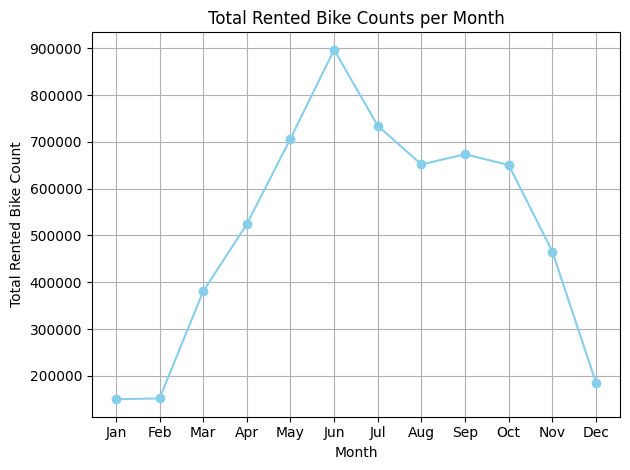

In [9]:
df = pd.DataFrame(bike_df)

# Convert 'Date' column to datetime type with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Group the data by 'Month' and calculate the sum of rented bike counts for each month
monthly_counts = df.groupby('Month')['Rented Bike Count'].sum()

# Plotting the line graph
monthly_counts.plot(kind='line', marker='o', color='skyblue')

# Adding labels and title
plt.title('Total Rented Bike Counts per Month')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')

# Customizing x-axis ticks
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


In [10]:
bike_df = bike_df.drop(['Functioning Day', 'Holiday'] , axis=1)

In [11]:
# One-hot encode 'Seasons', 'Holiday', and 'Functioning Day'
bike_df = pd.get_dummies(bike_df, columns=['Seasons'])

bike_df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,False,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,False,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,False,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,False,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,True,False,False,False
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,True,False,False,False
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,True,False,False,False
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,True,False,False,False


In [12]:
# Replace True and False with 1 and 0
bike_df.replace({True: 1, False: 0}, inplace=True)

# Display the modified DataFrame
bike_df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0


## Now, applying Machine Learning Models to check if we can succesfully make predictions for the data

## 1. Lasso Regression
#### Using sklearn

### Train Model Function

In [13]:
def train_model(Season, Hour) :

    if Hour == 'Night' :
        new_df = bike_df[(bike_df[f'Seasons_{Season}'] == 1) & (bike_df['Hour'] >= 0) & (bike_df['Hour'] <= 7)]

    elif Hour == 'Day' :
        new_df = bike_df[(bike_df[f'Seasons_{Season}'] == 1) & (bike_df['Hour'] >= 8) & (bike_df['Hour'] <= 15)]

    else :
        new_df = bike_df[(bike_df[f'Seasons_{Season}'] == 1) & (bike_df['Hour'] >= 16) & (bike_df['Hour'] <= 23)]


    new_df.drop(['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Hour'], axis=1, inplace=True)
    
    # Prepare features and target variable
    X1 = new_df.drop('Rented Bike Count', axis=1)
    X = X1.drop(['Date', 'Dew point temperature(°C)'], axis=1)
    y = new_df['Rented Bike Count']  # Target variable: Rented Bike Count

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an instance of StandardScaler
    scaler = StandardScaler()

    # Fit the scaler to your data (compute mean and standard deviation)
    scaler.fit(X_train)

    # Transform the training data
    X_train_scaled = scaler.transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)


    model = Lasso(alpha=1)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate R-squared
    r_squared = model.score(X_test_scaled, y_test)
    print(f"For Season {Season} and for Hour {Hour}")
    print("R-squared:", r_squared)

    return (model, scaler)


### Storing models

In [14]:
Seasons = ["Spring", "Autumn" ,"Summer", "Winter"]
Hours = ["Day", "Night", "Evening"]

Models = {}

for Season in Seasons :
    for Hour in Hours :
        Models[(Season, Hour)] = train_model(Season, Hour) 

For Season Spring and for Hour Day
R-squared: 0.3698228223704473
For Season Spring and for Hour Night
R-squared: 0.2894211006233297
For Season Spring and for Hour Evening
R-squared: 0.5299981568125144
For Season Autumn and for Hour Day
R-squared: 0.23501847147890775
For Season Autumn and for Hour Night
R-squared: 0.18915530680099224
For Season Autumn and for Hour Evening
R-squared: 0.2810999678416175
For Season Summer and for Hour Day
R-squared: 0.25370536333804095
For Season Summer and for Hour Night
R-squared: 0.31528728212133883
For Season Summer and for Hour Evening
R-squared: 0.2651669731807007
For Season Winter and for Hour Day
R-squared: 0.28450336350189454
For Season Winter and for Hour Night
R-squared: 0.1054579493515464
For Season Winter and for Hour Evening
R-squared: 0.2690436401235864


### Predicing Data

In [15]:
def predict_output(user_input):
    season = user_input.Seasons[0]
    Hour = user_input.Hour[0]
    if Hour >= 0 and Hour <= 7 :
        hour = "Night"

    elif Hour >= 8 and Hour <= 15 :
        hour = "Day"

    else :
        hour = "Evening"

    model, scaler = Models[(season, hour)]
    user_input.drop(["Seasons", "Hour", 'Functioning Day', 'Holiday', 'Date', 'Dew point temperature(°C)'], axis=1, inplace=True)
    predictions = model.predict(scaler.transform(user_input))
    return round(predictions[0])

### Getting User Input

In [17]:
final_input = {
    'Date': ['01/12/2019'],
    'Hour': [7],
    'Temperature(°C)': [-5.2],
    'Humidity(%)': [37],
    'Wind speed (m/s)': [2.2],
    'Visibility (10m)': [2000],
    'Dew point temperature(°C)': [-17.6],
    'Solar Radiation (MJ/m2)': [0.0],
    'Rainfall(mm)': [0.0],
    'Snowfall (cm)': [0.0],
    'Seasons': ['Autumn'],
    'Holiday': ['No Holiday'],
    'Functioning Day': ['Yes']
}

final_df = pd.DataFrame(final_input)
print("The Number of Bikes needed according to the season and hour are :" , predict_output(final_df))

The Number of Bikes needed according to the season and hour are : 366
